**Roman Schiffino**

Spring 2024

CS 251: Data Analysis and Visualization

Project 3: Linear regression

Polynomial regression

In [222]:
import os
import random
import numpy as np
import matplotlib.pyplot as plt

import charts
import data
import linear_regression

plt.style.use(['seaborn-v0_8-colorblind', 'seaborn-v0_8-darkgrid'])
plt.rcParams.update({'font.size': 20})

np.set_printoptions(suppress=True, precision=5)

# Automatically reload external modules
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Task 3: Polynomial Regression

We have been creating linear regression fits of form $y =c_0 + c_1x_1 + c_2x_2 + \ldots$, where $x_i$ are independent variables (columns of $A$) and $c_i$ are corresponding coefficients in $c$. However, this equation only allows us to fit data with a line/plane. This may not be the best choice for all datasets.

In this task, you will generalize the linear regression model form to include higher-degree (>1) polynomial terms and explore how this may improve fits to complex data. For example, assume we're doing a simple linear regression with independent variable $x_1$ and dependent variable $y$. A linear regression that fits data with a quadratic shape has the form$$y = c_0 + c_1x_1 + c_2x_1^2$$

Complete the following steps to add support for polynomial regression in your `LinearRegression` class.

### 3a. Build the polynomial matrix of the independent variable

The polynomial matrix contains the independent variable raised to a different power in each column. For example, if $A$ originally has a column vector for the independent variable $\vec{x_1}$ ($A = [\vec{x_1}]$) and we wanted to make the above quadratic model, we would append $x_1^2$ ($A = [\vec{x_1}, \vec{x_1^2}]$).

**TODO:**
Implement and test `LinearRegression::make_polynomial_matrix` (*helper method*) that takes care of raising the independent variable samples to different powers.

##### Test `make_polynomial_matrix`

In [223]:
test_A = np.r_[1:10].reshape((9, 1))
test_p = 3

# Test cubic
lin_reg = linear_regression.LinearRegression(data.Data())
print(f'Your polynomial matrix:\n{lin_reg.make_polynomial_matrix(test_A, 3)}')

true_mat = '''
[[  1.   1.   1.]
 [  2.   4.   8.]
 [  3.   9.  27.]
 [  4.  16.  64.]
 [  5.  25. 125.]
 [  6.  36. 216.]
 [  7.  49. 343.]
 [  8.  64. 512.]
 [  9.  81. 729.]]
'''
print('It should look like:\n', true_mat)

Your polynomial matrix:
[[  1.   1.   1.]
 [  2.   4.   8.]
 [  3.   9.  27.]
 [  4.  16.  64.]
 [  5.  25. 125.]
 [  6.  36. 216.]
 [  7.  49. 343.]
 [  8.  64. 512.]
 [  9.  81. 729.]]
It should look like:
 
[[  1.   1.   1.]
 [  2.   4.   8.]
 [  3.   9.  27.]
 [  4.  16.  64.]
 [  5.  25. 125.]
 [  6.  36. 216.]
 [  7.  49. 343.]
 [  8.  64. 512.]
 [  9.  81. 729.]]


### 3b. Add support for polynomial regression

This can be performed in 3 steps:


1. Implement the `LinearRegression::polynomial_regression` method to perform the polynomial regression (*alternate option: you may instead update your `linear_regression` method. If you decide to go this route, add a keyword argument for the polynomial degree with a default value of 1 to preserve compatability with regular linear regression.*).
2. Update `LinearRegression::predict`: Run `make_polynomial_matrix` on the "A" matrix that enters into the computation $y = Ac$ if `self.p > 1`.
3. Add support for plotting polynomials in `LinearRegression::scatter` by generalizing the plotted regression line to a regression polynomial if `self.p > 1`:
    - Getting your polynomial "x" values: Run `make_polynomial_matrix` on your evenly-spaced line sample points. To get the shapes to work out, you may need to add a trailing singleton dimension to your "x" sample points. For example, if you have 1000 "x" sample points, make the shape `(1000, 1)` rather than `(1000,)`.
    - Getting your polynomial "y" values: Use matrix multiplication with your polynomial regression model slopes and/or intercepts.

*There is no explicit test code here — visualizing the fit in the next subtask will help you debug!*

### 3c. Run a polynomial regression

In this subtask, you will debug your polynomial regression implementation and experiment fitting some data with it.

#### Test: Polynomial regression with linear model ($p = 1$)

- In the cell below, fit the `poly_data.csv` dataset using polynomial regression where the polynomial degree $p = 1$.
- Use `scatter` to plot the results.
- Print out the mean squared error.

The plot created by running the below cell should "look right" to you.

Reading data from file: data/poly_data.csv
Data extracted from file. 
Now processing data...

Data processing complete!

MSE: 71.81095284569932
Coefficients: [[-0.57373]
 [ 0.99395]]


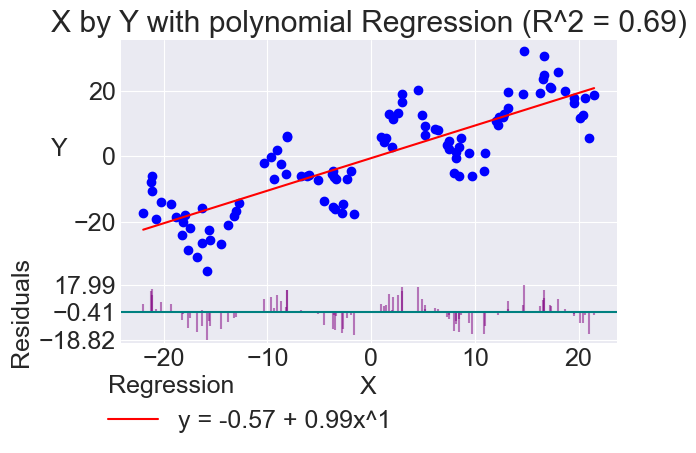

In [224]:
# Load the data
data_set = data.Data('data/poly_data.csv')
lin_reg = linear_regression.LinearRegression(data_set)
output = lin_reg.regression(["X"], "Y", regress_type="polynomial", degree=1, plot_on=True, summary_data=True)
print(f'MSE: {output[-1]["mse"]}')
print(f'Coefficients: {output[-1]["coeffs"]}')

#### Test: polynomial regression with high degree polynomials

Repeat the steps from the $p = 1$ test above in the cell below, but this time try $p = 7$. 

*Your regression fit should not be a line!*

MSE: 71.81095284569932
Coefficients: [[-0.57373]
 [ 0.99395]]
MSE: 71.76196386502876
Coefficients: [[-0.82051]
 [ 0.99524]
 [ 0.0015 ]]
MSE: 69.87982260694507
Coefficients: [[-0.89847]
 [ 1.24834]
 [ 0.00117]
 [-0.00085]]
MSE: 68.56155885782586
Coefficients: [[ 0.38384]
 [ 1.25015]
 [-0.02608]
 [-0.00083]
 [ 0.00007]]
MSE: 58.79729687078314
Coefficients: [[ 0.07765]
 [ 0.39441]
 [-0.01568]
 [ 0.0075 ]
 [ 0.00004]
 [-0.00002]]
MSE: 58.397592904303636
Coefficients: [[ 0.85885]
 [ 0.39948]
 [-0.04901]
 [ 0.00761]
 [ 0.00024]
 [-0.00002]
 [-0.     ]]
MSE: 55.030880732780965
Coefficients: [[ 1.01462]
 [ 1.09101]
 [-0.05279]
 [-0.00602]
 [ 0.00028]
 [ 0.00005]
 [-0.     ]
 [-0.     ]]


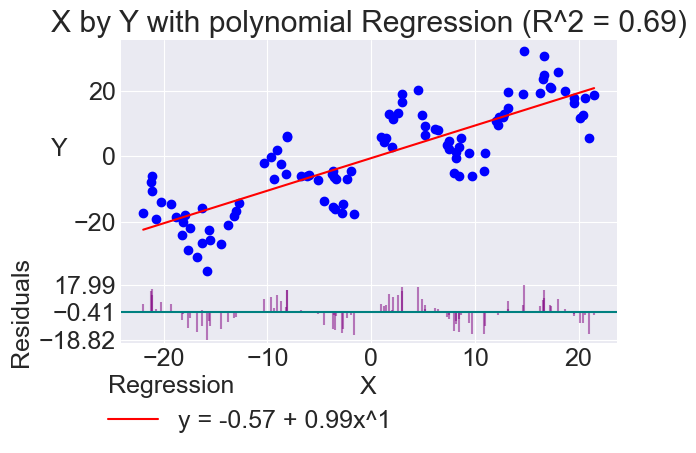

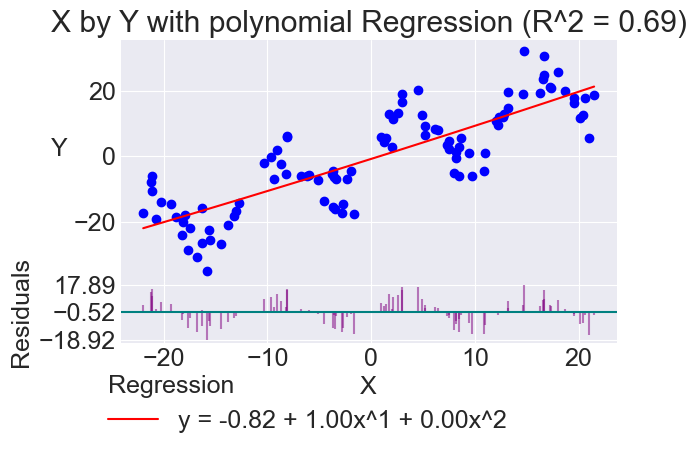

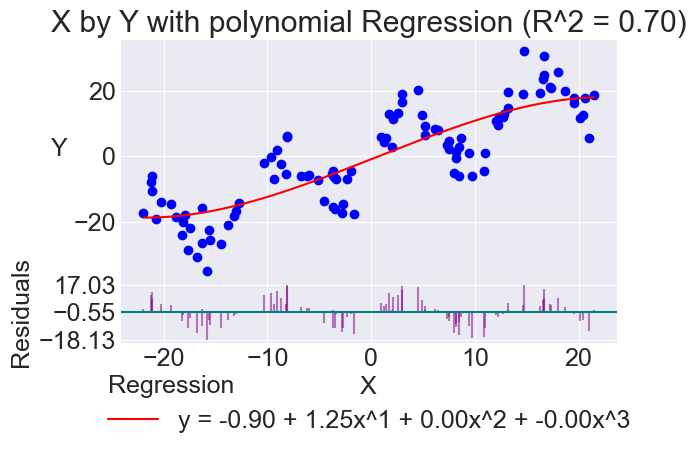

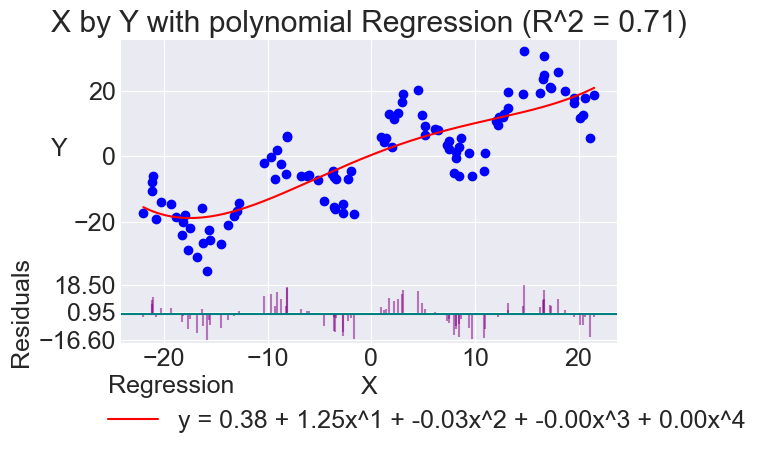

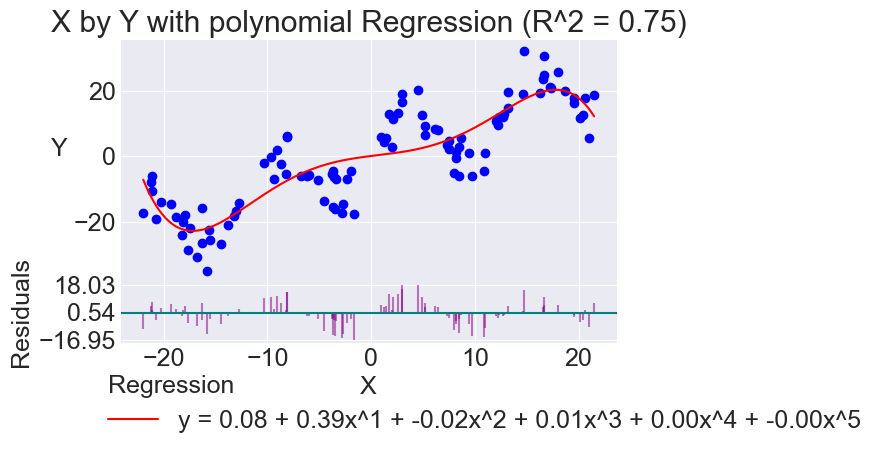

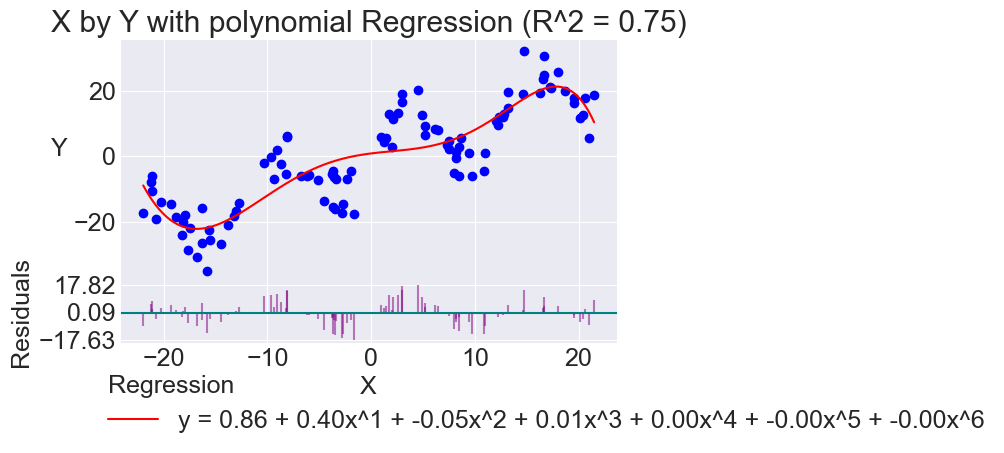

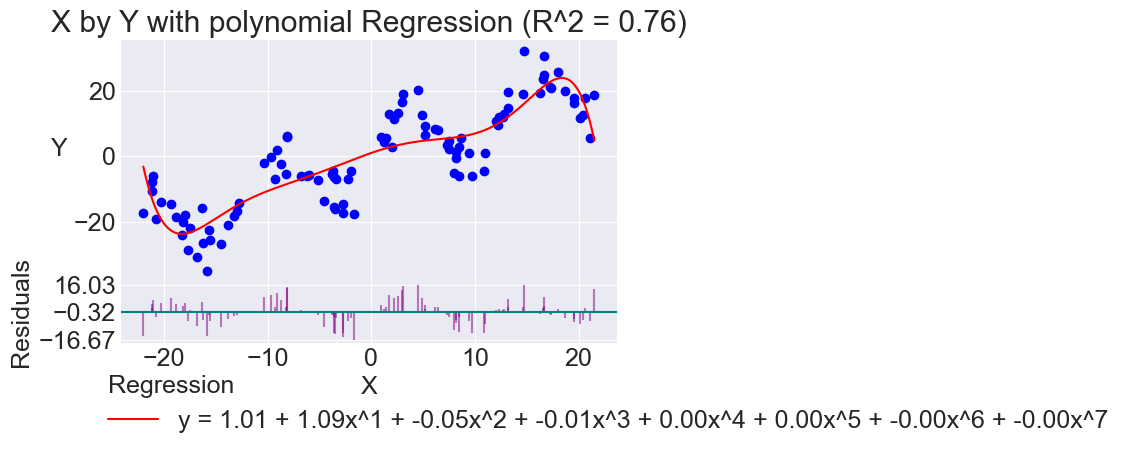

In [225]:
outputs = []
output = lin_reg.regression(["X"], "Y", regress_type="polynomial", degree=1, plot_on=True, summary_data=True)
outputs.append(output[-1])
print(f'MSE: {output[-1]["mse"]}')
print(f'Coefficients: {output[-1]["coeffs"]}')
output = lin_reg.regression(["X"], "Y", regress_type="polynomial", degree=2, plot_on=True, summary_data=True)
outputs.append(output[-1])
print(f'MSE: {output[-1]["mse"]}')
print(f'Coefficients: {output[-1]["coeffs"]}')
output = lin_reg.regression(["X"], "Y", regress_type="polynomial", degree=3, plot_on=True, summary_data=True)
outputs.append(output[-1])
print(f'MSE: {output[-1]["mse"]}')
print(f'Coefficients: {output[-1]["coeffs"]}')
output = lin_reg.regression(["X"], "Y", regress_type="polynomial", degree=4, plot_on=True, summary_data=True)
outputs.append(output[-1])
print(f'MSE: {output[-1]["mse"]}')
print(f'Coefficients: {output[-1]["coeffs"]}')
output = lin_reg.regression(["X"], "Y", regress_type="polynomial", degree=5, plot_on=True, summary_data=True)
outputs.append(output[-1])
print(f'MSE: {output[-1]["mse"]}')
print(f'Coefficients: {output[-1]["coeffs"]}')
output = lin_reg.regression(["X"], "Y", regress_type="polynomial", degree=6, plot_on=True, summary_data=True)
outputs.append(output[-1])
print(f'MSE: {output[-1]["mse"]}')
print(f'Coefficients: {output[-1]["coeffs"]}')
output = lin_reg.regression(["X"], "Y", regress_type="polynomial", degree=7, plot_on=True, summary_data=True)
outputs.append(output[-1])
print(f'MSE: {output[-1]["mse"]}')
print(f'Coefficients: {output[-1]["coeffs"]}')

### 3d. Questions

**Question 5:** Describe the `p=7` fit compared to `p=1` — is it better or worse? Why?

**Question 6:** Describe what happens visually to the shape of the regression curve and in relation to the data as you experiment with the polynomial degree between 1 and 7. 

**Question 7:** Create and interpret a plot showing the MSE values as the polynomial degree goes from 1 to 7.

**Answer 5:** 

p=7 is considerably better than p=1. The fit is clearly better because the residual plot is smaller, mse is smaller and $R^2$ is closer to 1. Not only this but also the p=7 plot just looks like a closer approxiamtion than the p=1 plot.

**Answer 6:** 

Visually as we go from p=1 to p=7 the shape of the regression curve becomes more and more complex with more curves and inflection points. As we increase the polynomial degree, the regression curve gets curvier and starts to fit the data better. However, we note that although the regressions for degree 6 and 7 don't seem to use the 6th degree polynomials to fit the data, the MSE is still smaller than the previous degrees and the coefficients are different. I assume this is due to the fact that the coefficients might small enough as to have zero in the first 10 decimal places and thus not be shown in the summary data.

**Answer 7:** 

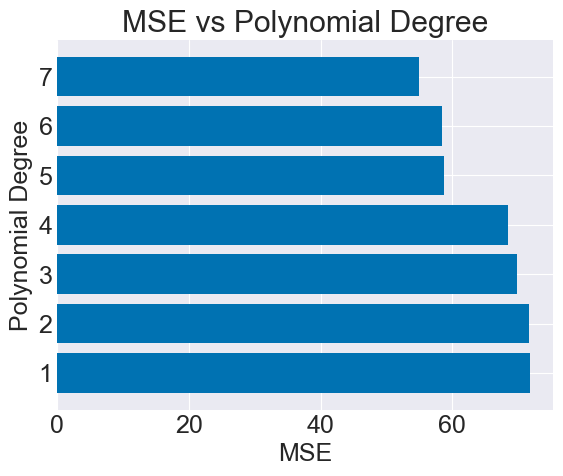

In [226]:
plt.barh([1, 2, 3, 4, 5, 6, 7], [output["mse"] for output in outputs])
plt.xlabel("MSE")
plt.ylabel("Polynomial Degree")
plt.title("MSE vs Polynomial Degree")
plt.yticks([1, 2, 3, 4, 5, 6, 7])
plt.tick_params(axis='y', which='both', left=False, right=False, labelleft=True)

Clearly, the MSE decreases as the polynomial degree increases. This is because the higher the polynomial degree, the more complex the model and the better it fits the data. We note trhat the underlying data is probably best fits models of odd degree as the change in MSE is more significant when going from even to odd degrees. This likely means that the underlying data is odd, by odd we effectively mean that data is antisymmetric across the y-axis.

## Task 4: Overfitting

In this subtask, you will experiment with how polynomial regression generalize to data not used to fit the regression model.

### 4a. Create fit and validation sets

The `poly_data.csv` dataset has 100 samples ($N=100$). In the cell below, split these samples into two separate "datasets" and create 2 `Data` objects representing:
- The first 50% of samples will be used to fit the regression model (i.e. run linear regression on these samples). We will call this the **fit set** (data used to fit the regression).
- The second 50% of samples will be set aside and only used to check how well the fitted regression generalizes to new data. We will call this the **validation set**.

The data samples are already shuffled.

*Hint: There is a helpful `Data` method for paring down a dataset into a certain range of samples.*

In [227]:
data_set_val = data.Data('data/poly_data.csv')
data_set.limit_samples(0, 50)
data_set_val.limit_samples(50, 100)
fit_data = data_set
val_data = data_set_val
print(f"fit_data: \n{fit_data}")
print(f"val_data: \n{val_data}")


Reading data from file: data/poly_data.csv
Data extracted from file. 
Now processing data...

Data processing complete!

Row count: 50
Order: 1
fit_data: 
┌─────────┬─────────┐
│    X    │    Y    │
├─────────┼─────────┤
│  2.147  │ 11.382  │
│  9.465  │  1.034  │
│  4.52   │ 20.251  │
│  1.974  │  2.89   │
│ -3.358  │ -6.809  │
│   ...   │   ...   │
│ -5.994  │ -5.744  │
└─────────┴─────────┘

Row count: 50
Order: 1
val_data: 
┌─────────┬─────────┐
│    X    │    Y    │
├─────────┼─────────┤
│  -3.65  │ -4.658  │
│  9.69   │ -6.107  │
│ -21.986 │ -17.271 │
│ -8.694  │  -2.22  │
│ -15.536 │ -25.608 │
│   ...   │   ...   │
│ -16.272 │ -26.528 │
└─────────┴─────────┘


Printing the `Data` object storing the fit set should yield:

    -------------------------------
    data/polydata.csv (50x2)
    Headers:
    X	Y
    Types:
    numeric	numeric
    -------------------------------
    Showing first 5/50 rows.
    2.147	11.382
    9.465	1.034
    4.52	20.251
    1.974	2.89
    -3.358	-6.809

    -------------------------------

Printing the `Data` object storing the validation set should yield:

    -------------------------------
    data/polydata.csv (50x2)
    Headers:
    X	Y
    Types:
    numeric	numeric
    -------------------------------
    Showing first 5/50 rows.
    -3.65	-4.658
    9.69	-6.107
    -21.986	-17.271
    -8.694	-2.22
    -15.536	-25.608

    -------------------------------

### 4b. Check fit generalization on validation set

Here is the process for checking how well your fitted linear regression model generalizes to the validation data:
1. Create `Data` objects for both the fit and validation data sets (*as you have already done*).
2. Run linear regression on the fit set.
3. Create a new `LinearRegression` object associated with the validation data.
4. Copy over the fitted slope and intercept coefficients associated with the fit set to the validation set `LinearRegression` object.
5. Create a scatterplot by calling `scatter` to show the validation data and the regression curve that uses the coefficients fitted on the fit dataset (copied over in Step 4).
6. Calculate and report fit statistics (e.g. MSE, $R^2$).

Before doing this, implement the following methods to help you copy over the fitted slope, intercept and other data from your fit set `LinearRegression` object:

- `get_fitted_slope`: return the fitted regression slopes.
- `get_fitted_intercept`: return the fitted regression intercept.
- `initialize(ind_vars, dep_var, slope, intercept, p)`: set fields based on passed in parameter values.

R2: 0.6863898169307061
MSE: 88.58467771864787


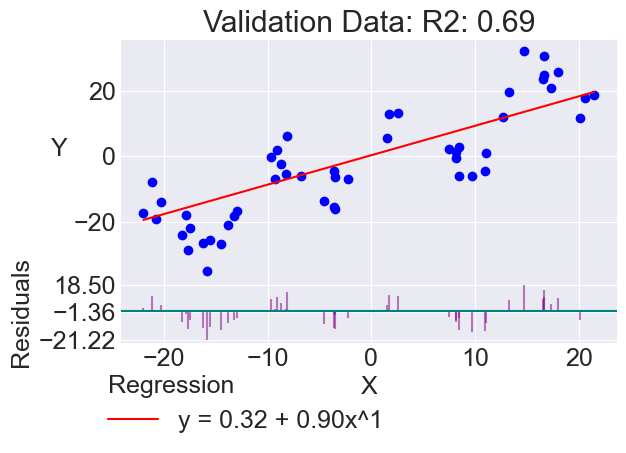

In [228]:
# Fit the model
lin_reg_fit = linear_regression.LinearRegression(fit_data)
output = lin_reg_fit.regression(["X"], "Y", regress_type="polynomial", degree=1, plot_on=True, summary_data=True, alt_out=True)
lin_reg_val = linear_regression.LinearRegression(val_data)
lin_reg_val.initialize(["X"], "Y", operand=output[0])
extData = lin_reg_fit.data_anal(lin_reg_val.lin_opp, lin_reg_val.y, lin_reg_val.A, as_dict=True)
r2 = extData["R2"]
outputMod = output[2][1]
outputMod["operand"] = lin_reg_val.lin_opp
outputMod["R2"] = r2
scatterOut = lin_reg_val.scatter("X", "Y", f"Validation Data: R2: {r2:.2f}", **outputMod)
print(f'R2: {r2}')
print(f'MSE: {extData["mse"]}')

#### Check overfitting with $p = 7$ polynomial regression model

In the cell below:

1. Fit a polynomial regression model with $p = 7$ on the fit set.
2. Create 2 scatter plots:
    - Showing the fit set and regression curve fitted to it.
    - Showing the validation set and regression curve that uses the fitted coefficients to the **fit set**.
3. Compute and print the MSE for both the fit and validation sets.

Use the 6 step process above to guide you through the setup.

MSE_Fit: 38.30258184051851
MSE_Val: 96.4587752293404


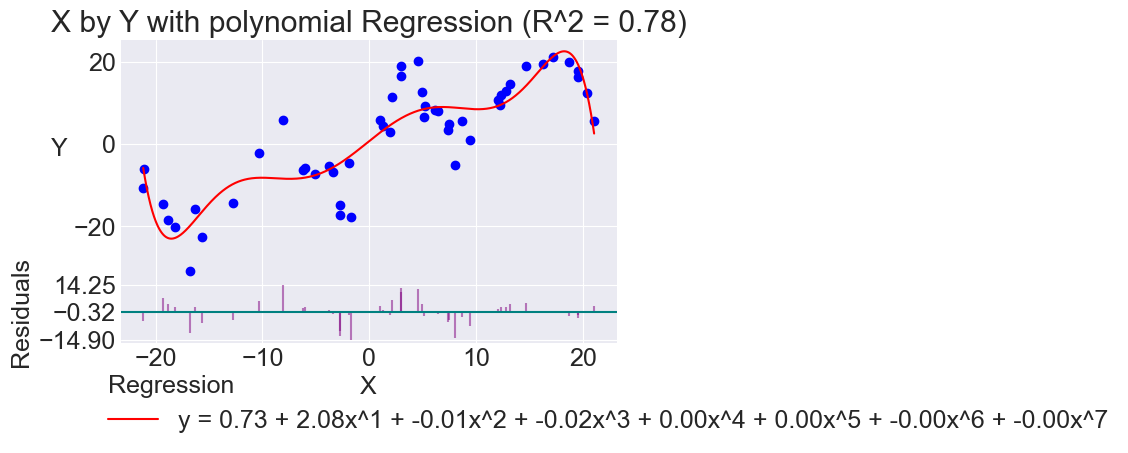

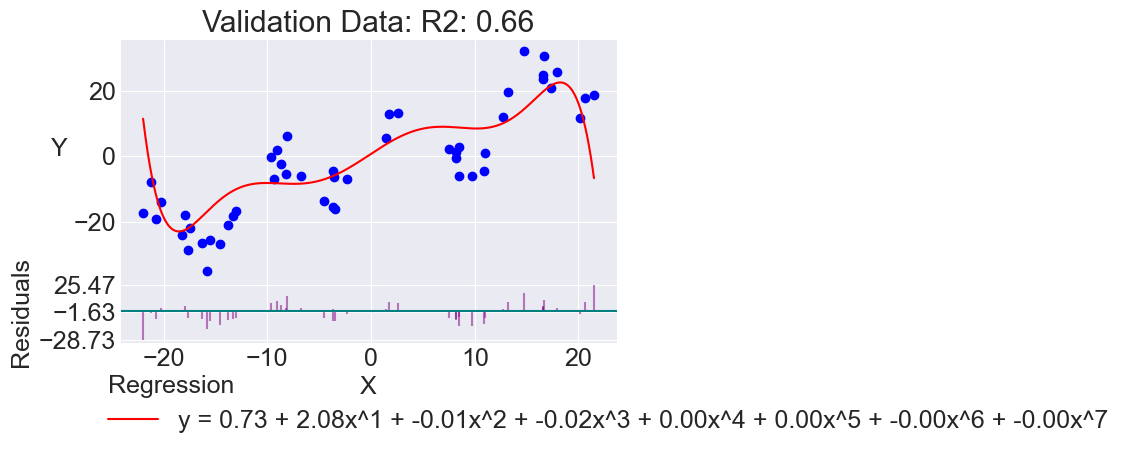

In [229]:
output = lin_reg_fit.regression(["X"], "Y", regress_type="polynomial", degree=7, plot_on=True, summary_data=True, alt_out=True)
lin_reg_val.initialize(["X"], "Y", operand=output[0])
extData = lin_reg_fit.data_anal(lin_reg_val.lin_opp, lin_reg_val.y, lin_reg_val.A, as_dict=True)
r2Val = extData["R2"]
outputMod = output[2][1]
outputMod["operand"] = lin_reg_val.lin_opp
outputMod["R2"] = r2Val
scatterOut1 = lin_reg_fit.scatter(*(output[2][0]), **(output[2][1]))
scatterOut2 = lin_reg_val.scatter("X", "Y", f"Validation Data: R2: {r2Val:.2f}", **outputMod)
print(f'MSE_Fit: {output[3]["mse"]}')
print(f'MSE_Val: {extData["mse"]}')

### 4c. Questions

**Question 8:** Describe how the fitted coefficients obtained for the fit set generalize to the validation set. Do they do a good or bad job? Why?

**Question 9:** Does the generalization improve or worsen for polynomial degrees < 7? Are Back up your observations with numbers (e.g. MSE, $R^2$).

**Question 10:** Are there any values/ranges of polynomial degrees that generalize acceptably to the validation set? Why do you think so?

**Question 11:** What happens when you increase the polynomial degree above 7, in the range $7-13$? Why do you think this happens? Back up your observations with numbers (e.g. MSE, $R^2$).

**Answer 8:**

The fitted coefficients obtained for the fit set do a good job of generalizing to the validation set. The R2 value is 0.69 and the MSE is 88.58. This is fairly good all things considered. This is based on the validation data thus clearly the linear fit is not overfit.

**Answer 9:**

In the case of the degree 7 polynomial we note that the validation R2 is considerably lower than that of the fit data, and similarly the validation MSE is quite a bit higher than that of the fit data. Thus, clearly, the degree 7 polynomial model is quite overfit.

Degree: 1
MSE_Fit: 59.59921097570395 
R2_Fit: 0.6600388084752988
MSE_Val: 88.58467771864787 
R2_Val: 0.6863898169307061

Degree: 2
MSE_Fit: 59.408408015828876 
R2_Fit: 0.6611271719036673
MSE_Val: 89.27378847228445 
R2_Val: 0.6839502059825309

Degree: 3
MSE_Fit: 53.48828745123432 
R2_Fit: 0.6948962639463439
MSE_Val: 93.01736764113971 
R2_Val: 0.6706970726110024

Degree: 4
MSE_Fit: 52.62252388256086 
R2_Fit: 0.6998346852704935
MSE_Val: 91.37791686902773 
R2_Val: 0.6765011063334947

Degree: 5
MSE_Fit: 49.807782194744085 
R2_Fit: 0.7158903162488051
MSE_Val: 79.81817769930052 
R2_Val: 0.717425248189782

Degree: 6
MSE_Fit: 49.69955230297777 
R2_Fit: 0.7165076727936504
MSE_Val: 79.18969400681186 
R2_Val: 0.7196502253634127

Degree: 7
MSE_Fit: 38.30258184051851 
R2_Fit: 0.7815173867606515
MSE_Val: 96.4587752293404 
R2_Val: 0.6585136963032001

Degree: 8
MSE_Fit: 38.2602099365514 
R2_Fit: 0.7817590812851932
MSE_Val: 95.50846395530091 
R2_Val: 0.6618780173155867

Degree: 9
MSE_Fit: 23.12312723961

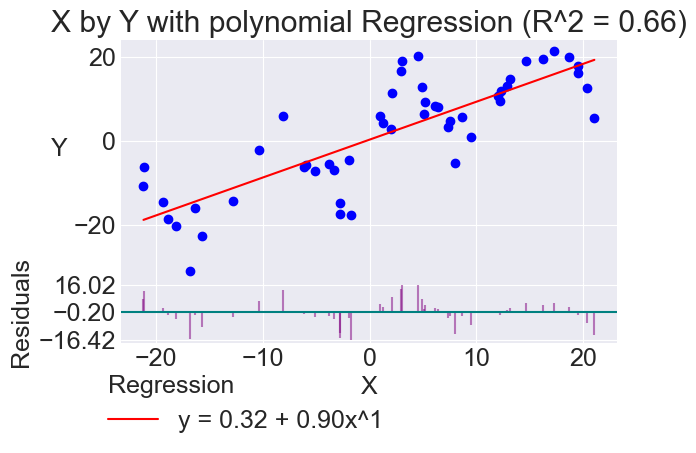

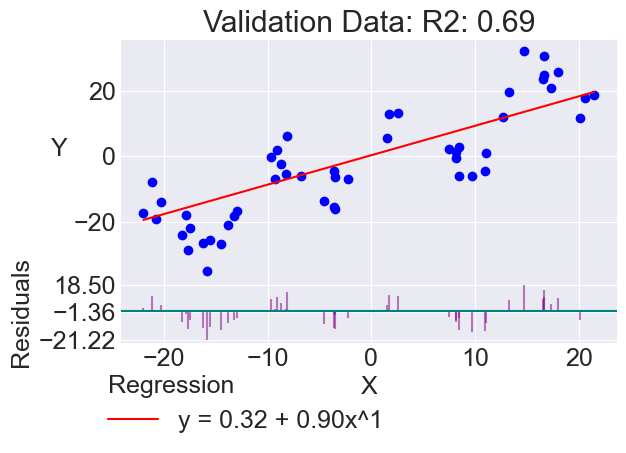

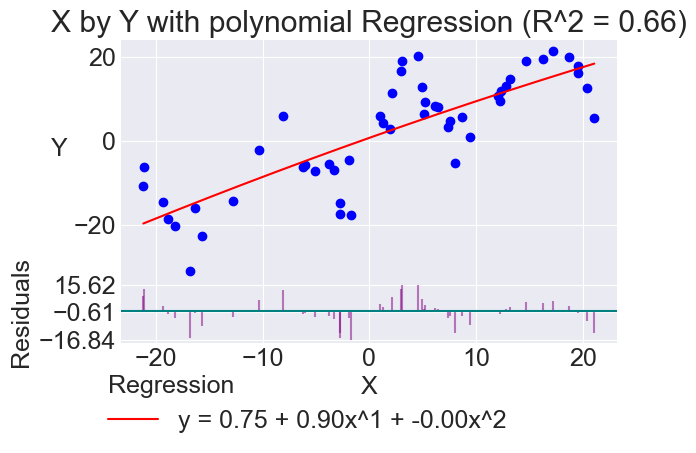

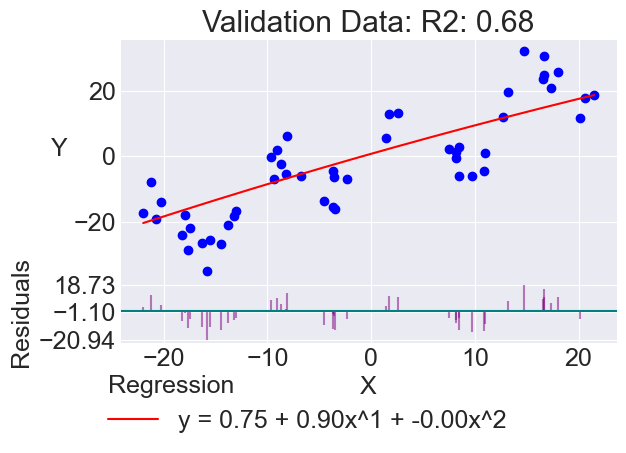

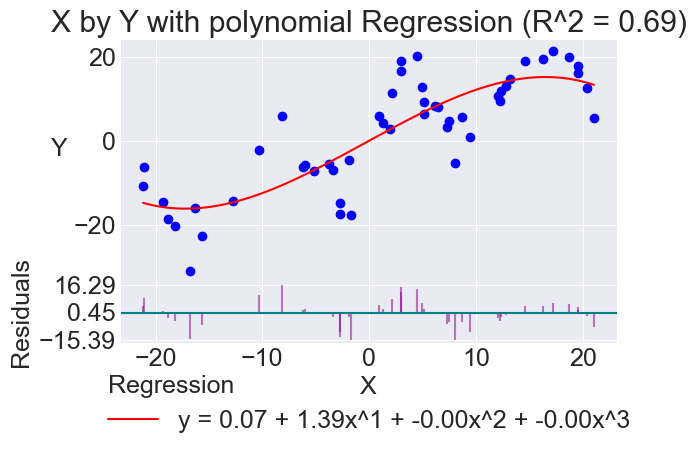

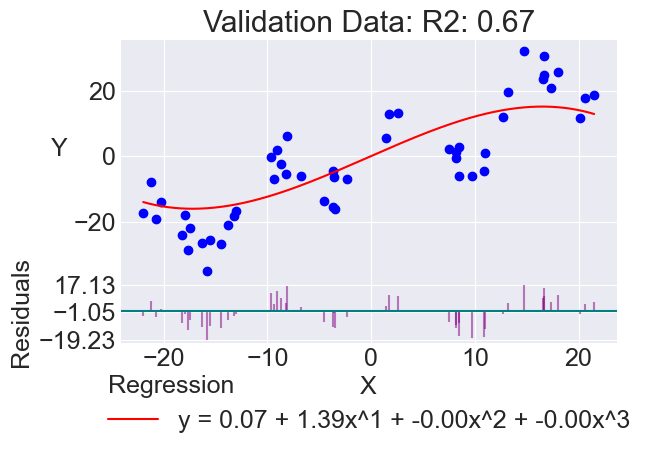

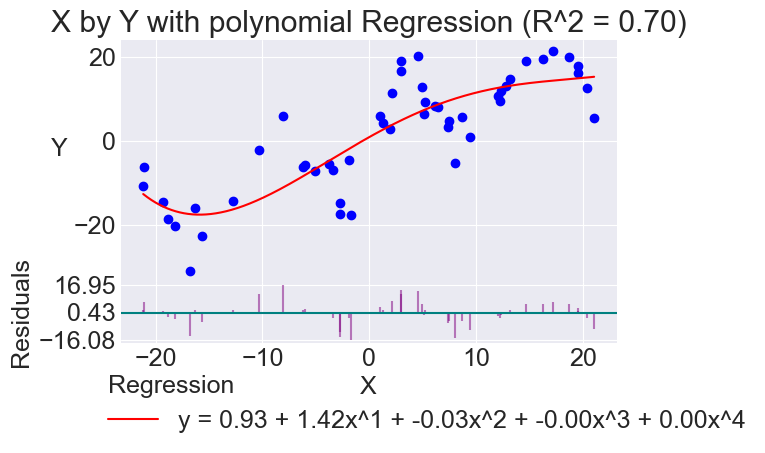

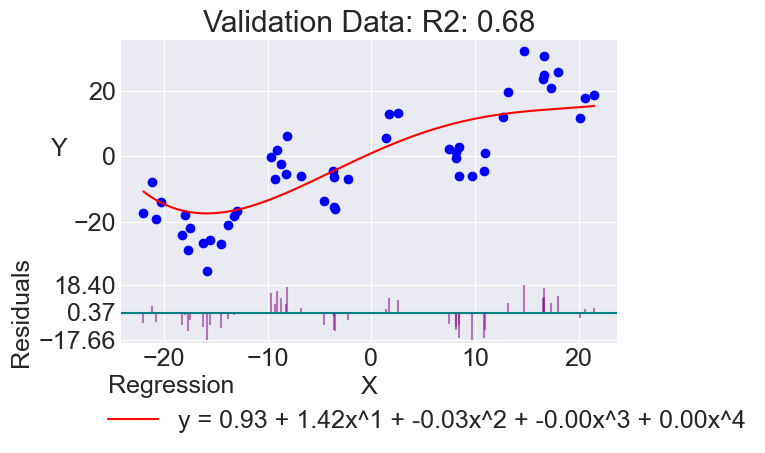

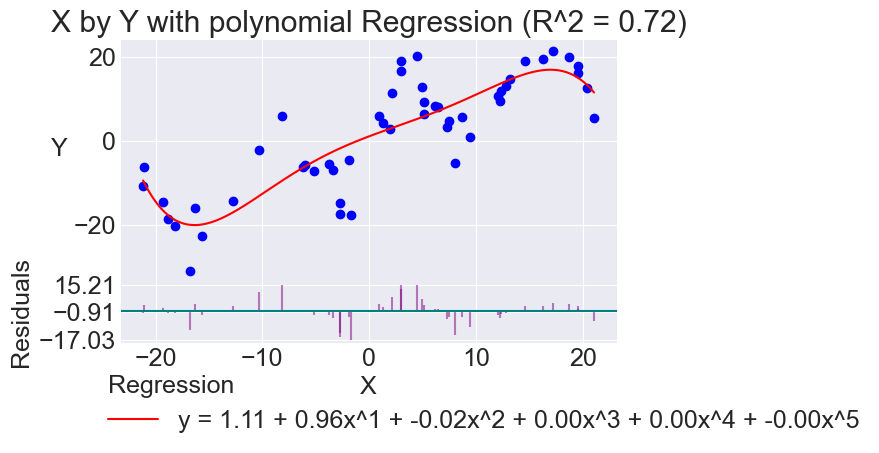

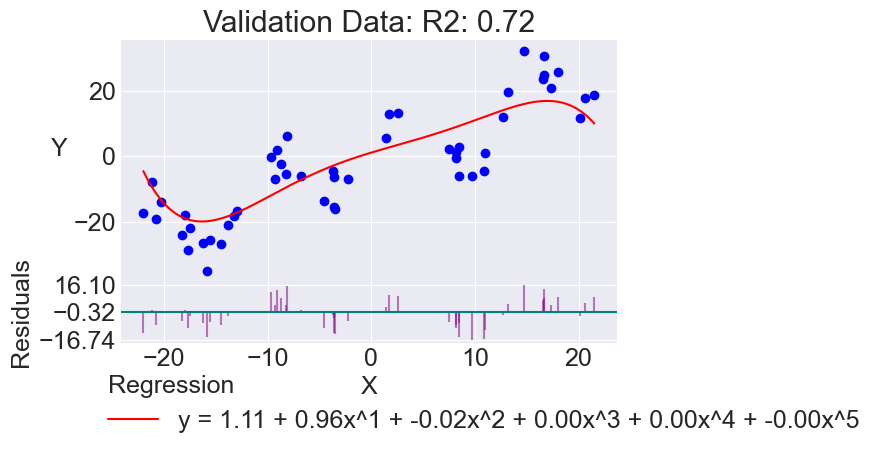

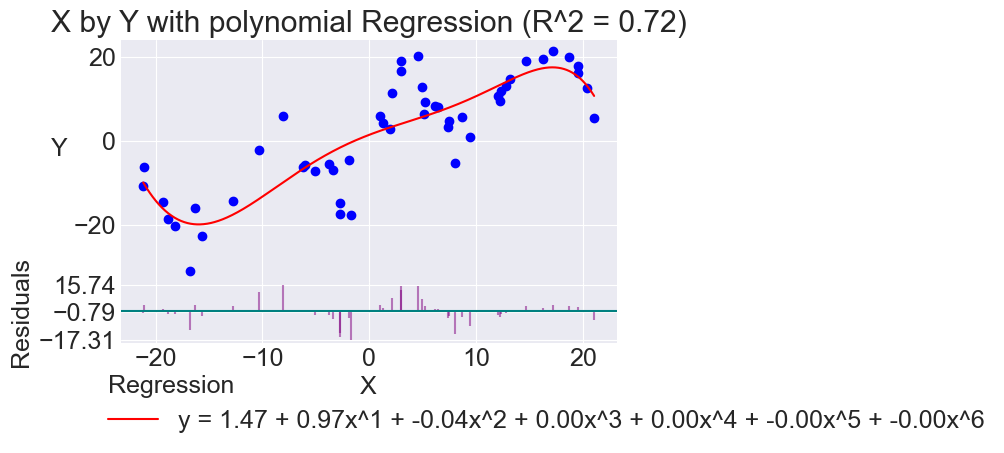

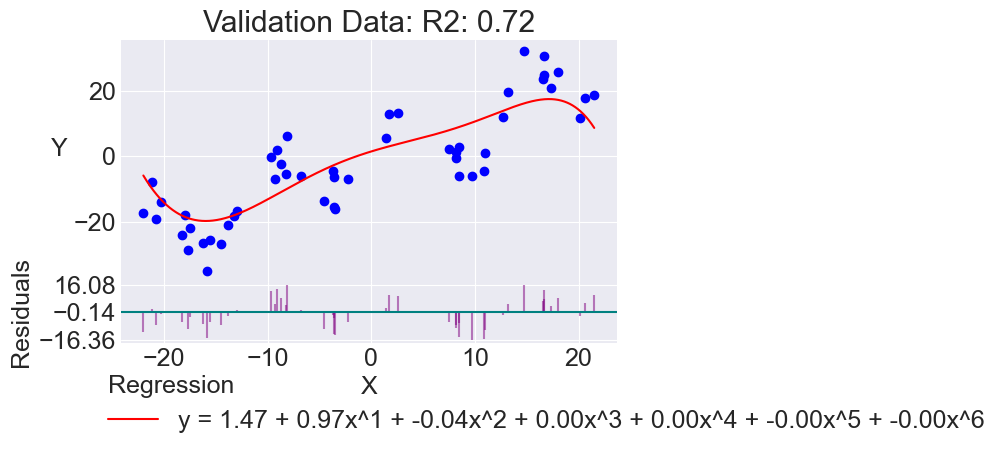

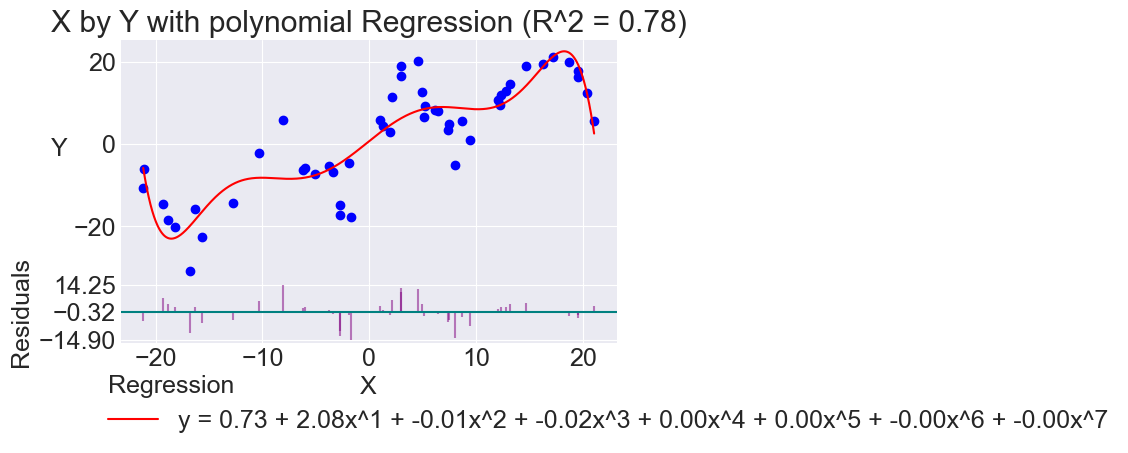

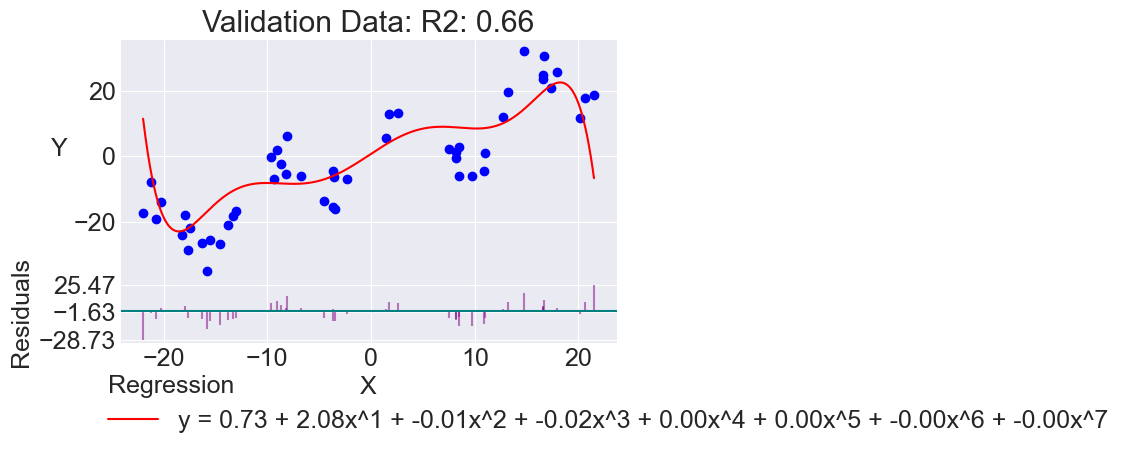

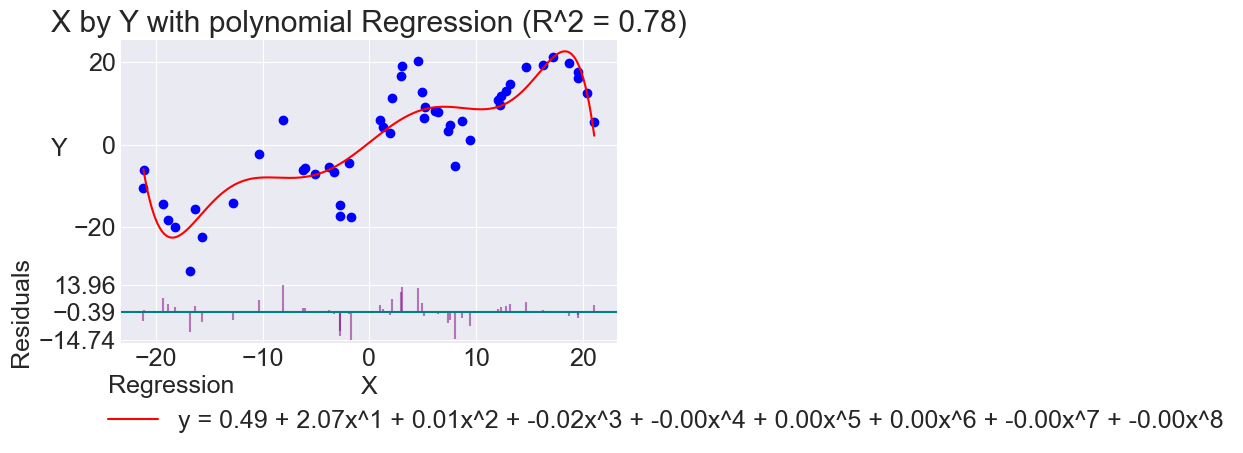

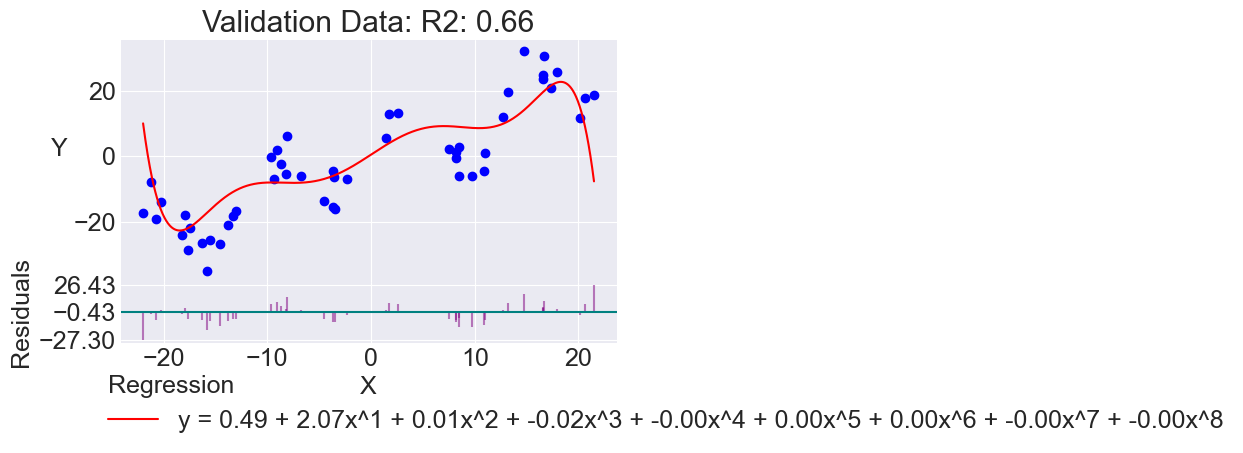

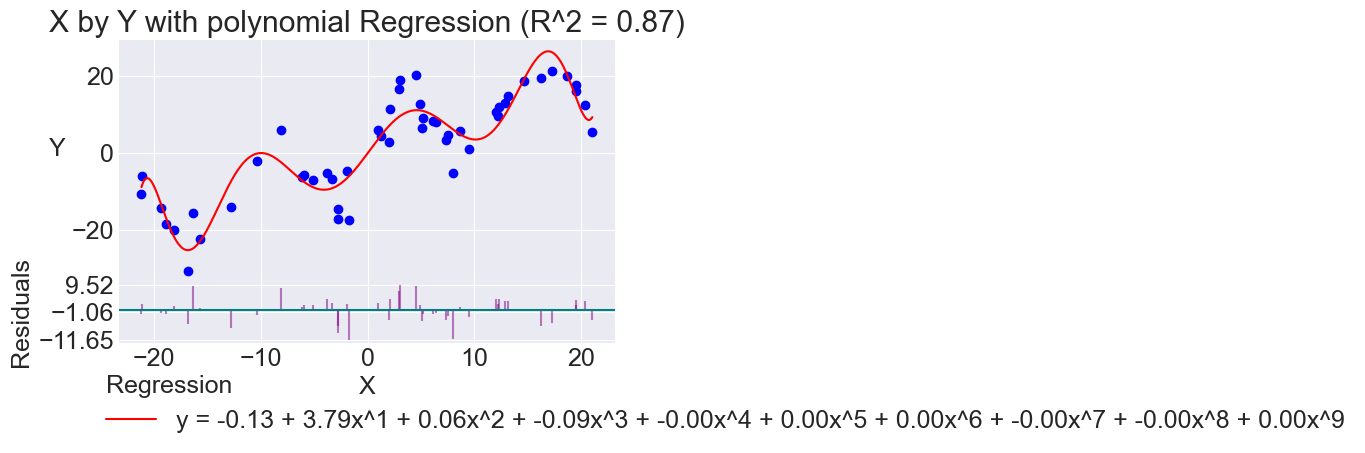

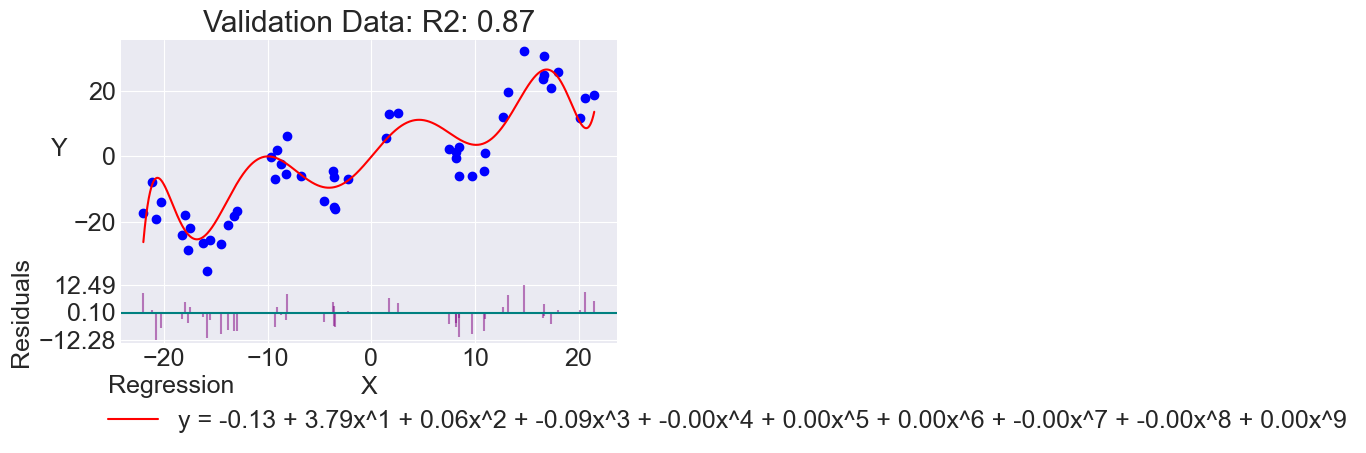

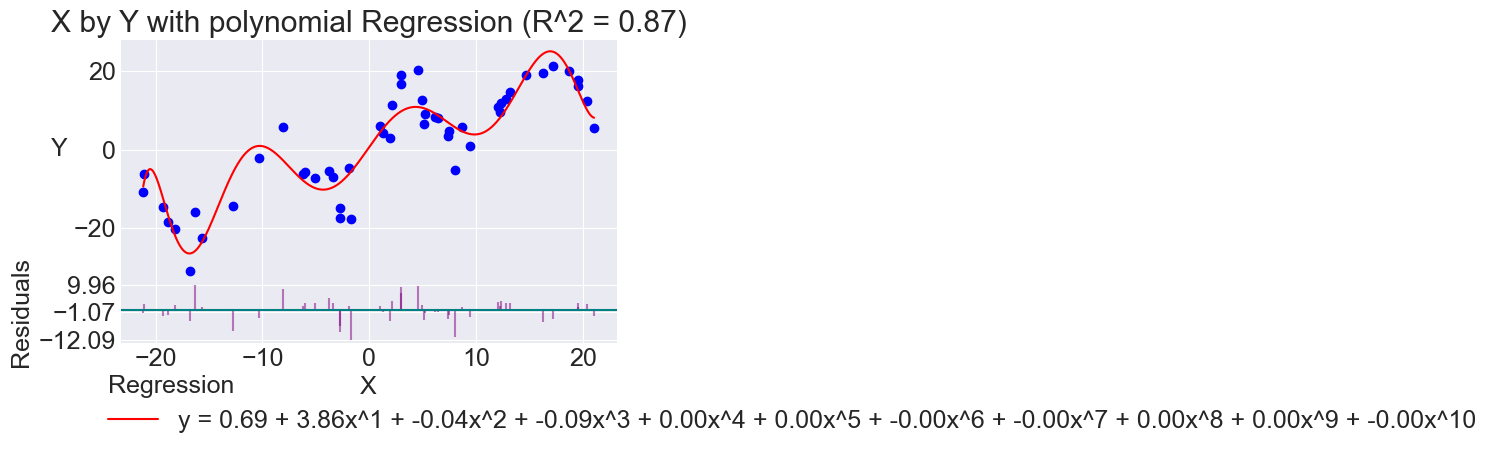

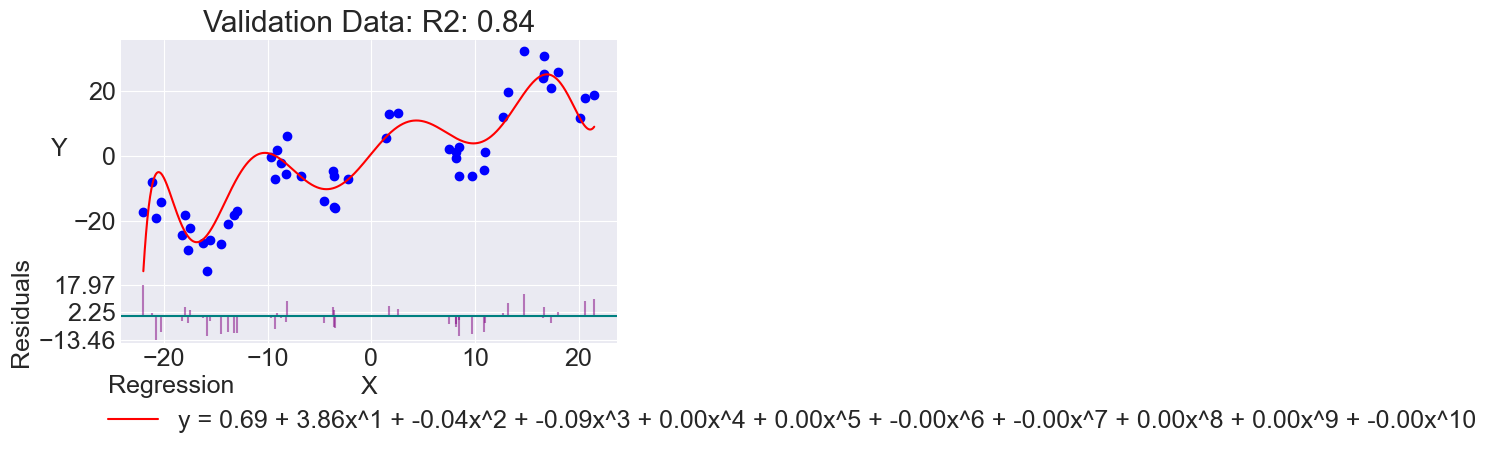

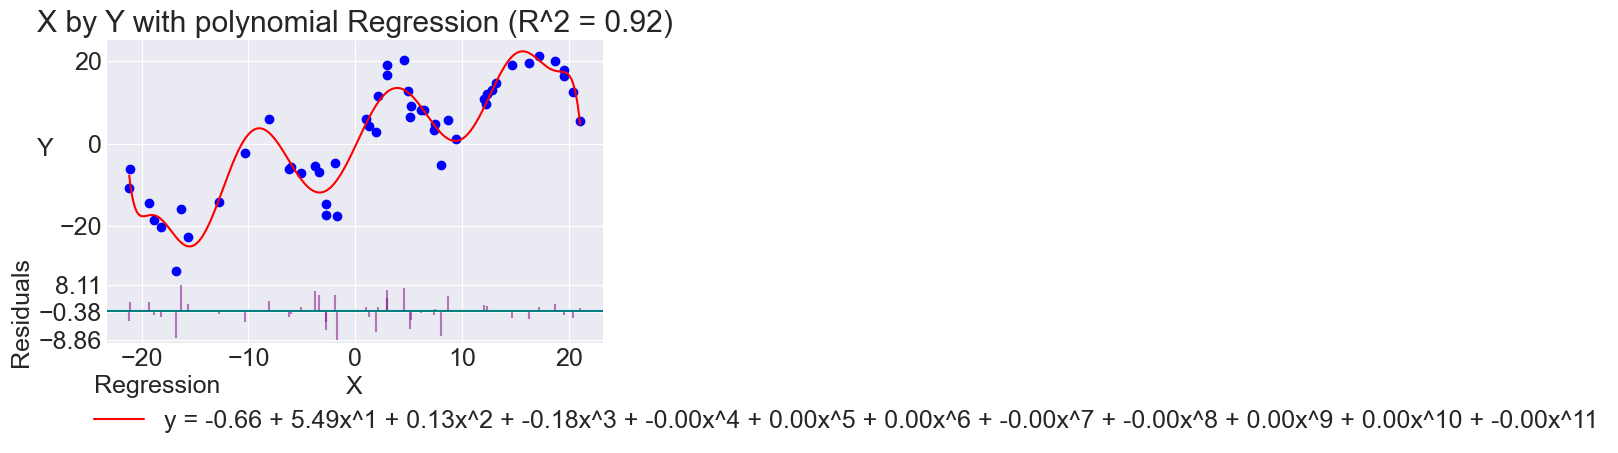

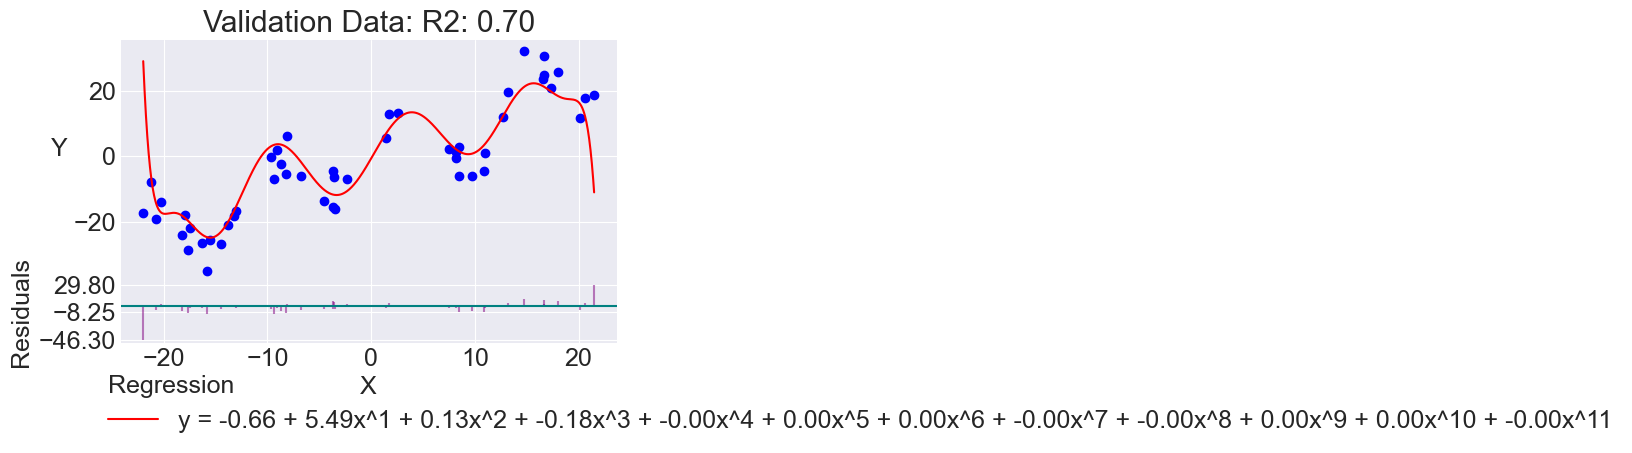

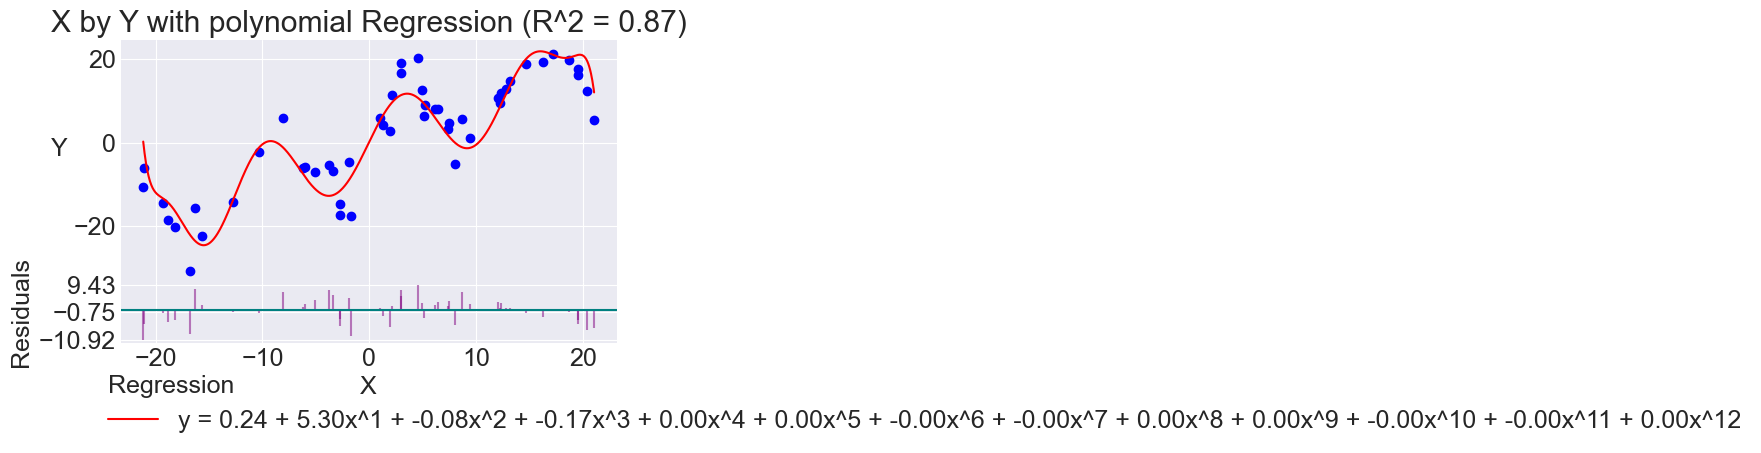

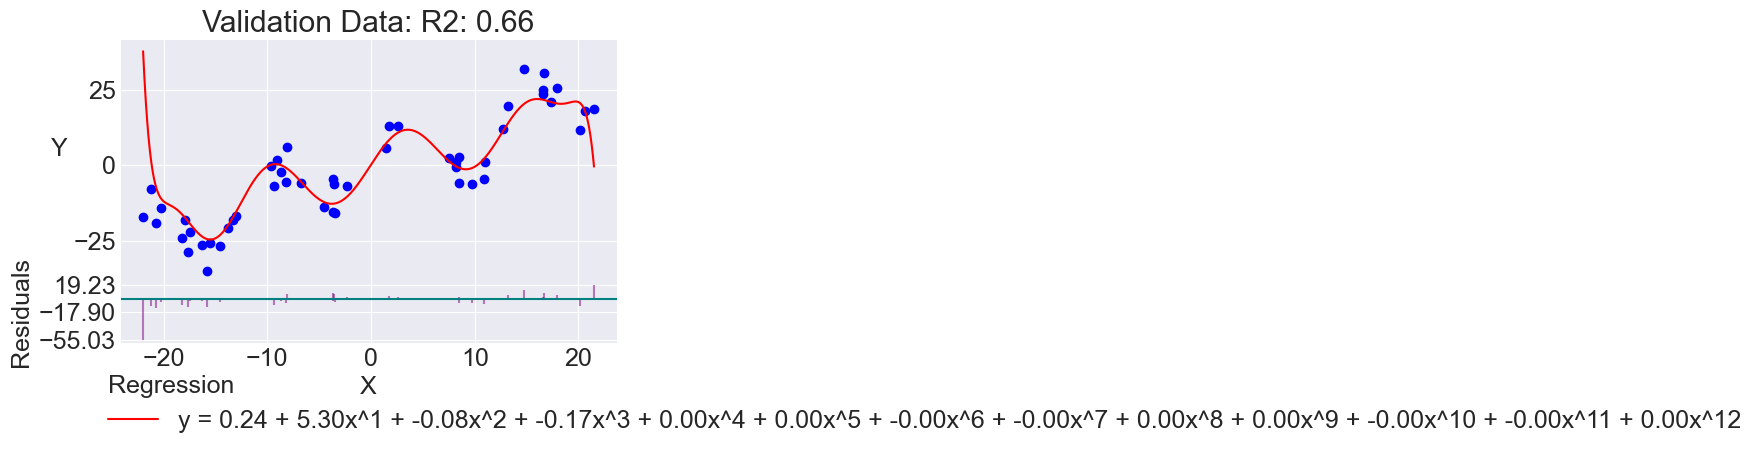

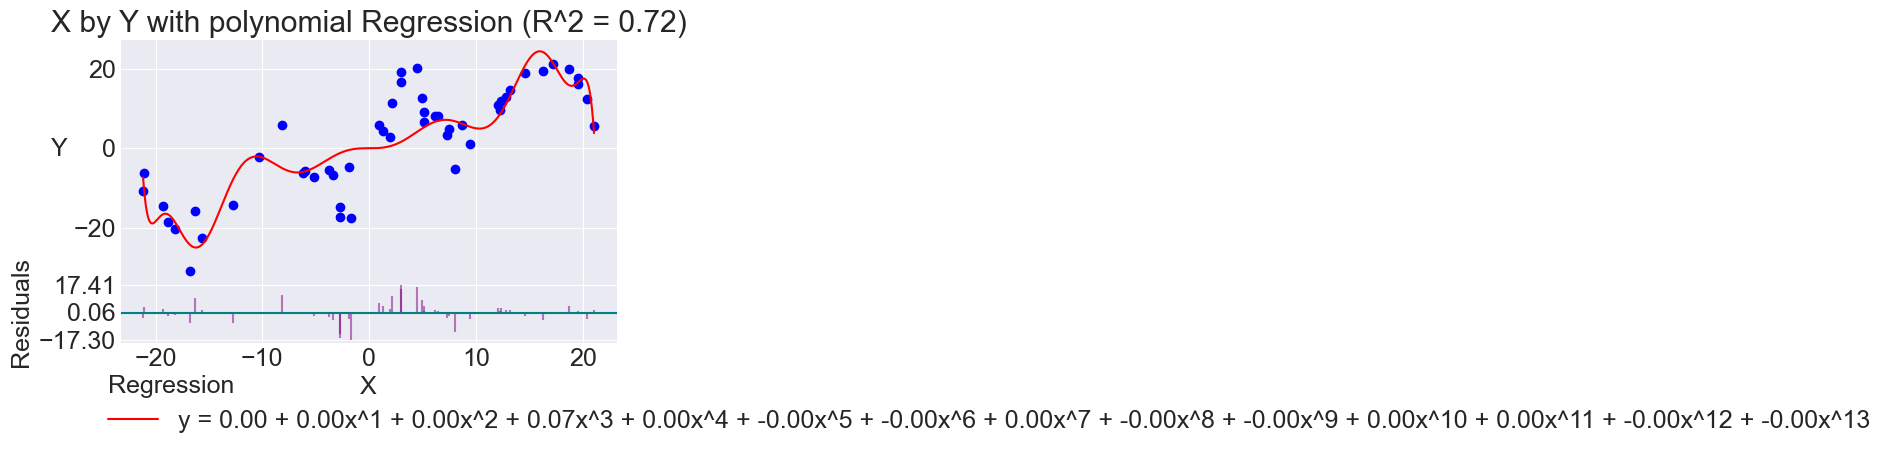

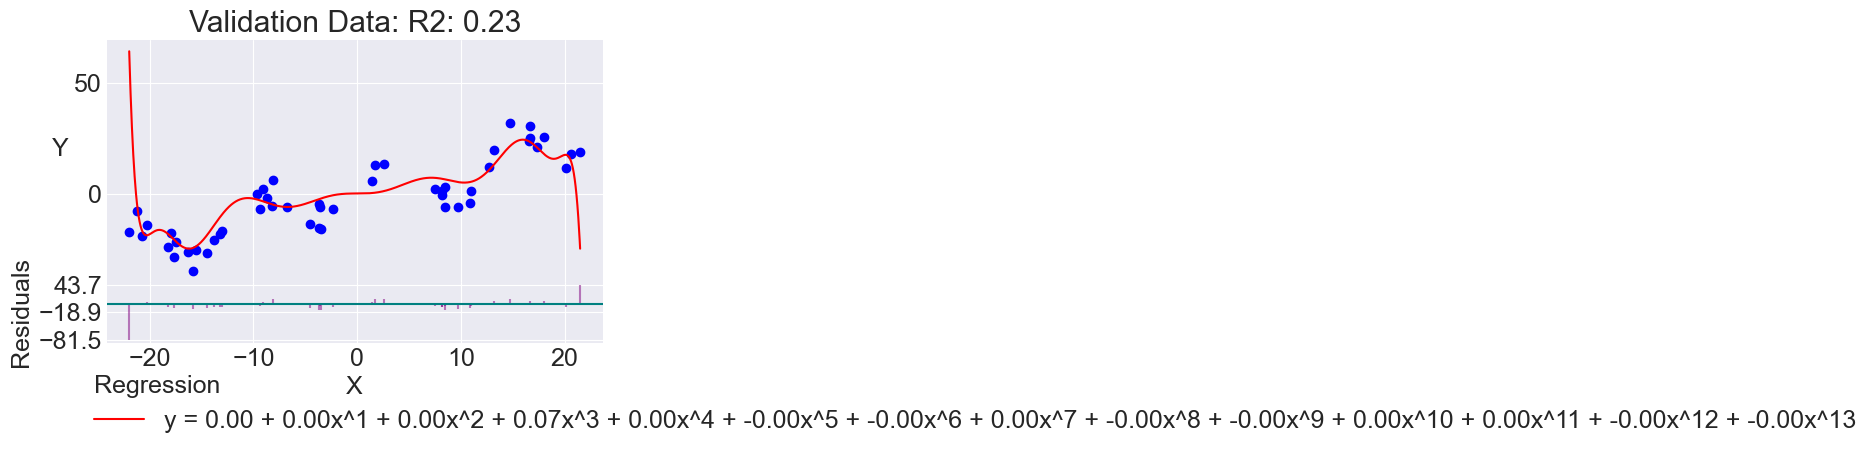

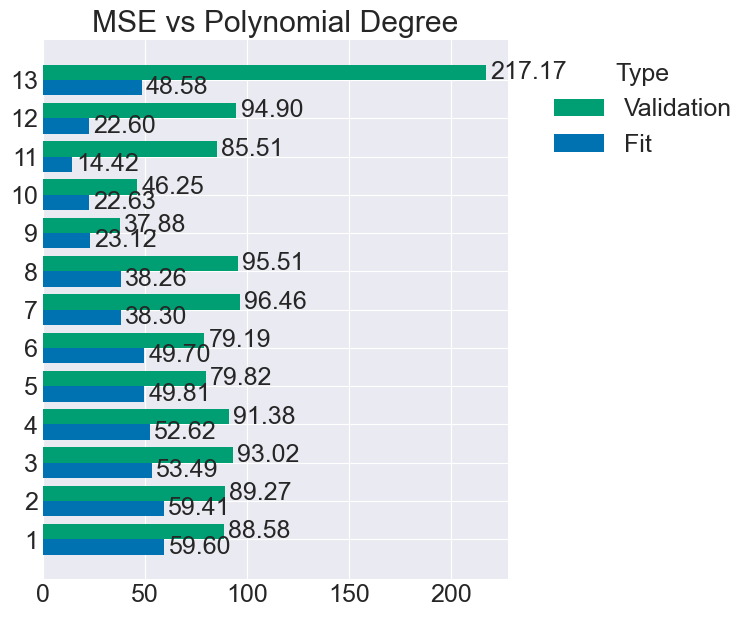

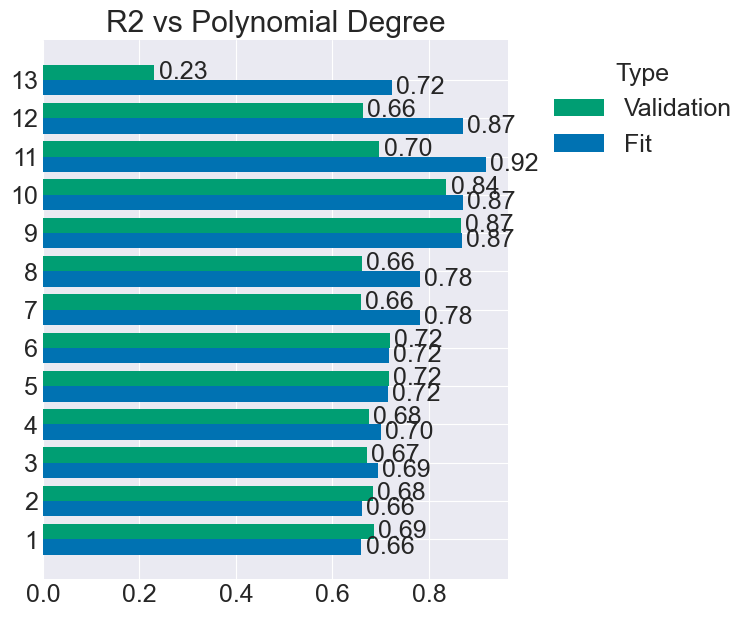

In [230]:
import charts
plt.close('all')
rcs = plt.rcParams
rcs['figure.max_open_warning'] = 30
outputs = []
outputMSEs = []
outputR2s = []
for i in range(13):
    output = lin_reg_fit.regression(["X"], "Y", regress_type="polynomial", degree=i+1, plot_on=True, summary_data=True, alt_out=True)
    lin_reg_val.initialize(["X"], "Y", operand=output[0])
    extData = lin_reg_fit.data_anal(lin_reg_val.lin_opp, lin_reg_val.y, lin_reg_val.A, as_dict=True)
    r2Val = extData["R2"]
    outputMod = output[2][1]
    outputMod["operand"] = lin_reg_val.lin_opp
    outputMod["R2"] = r2Val
    scatterOut1 = lin_reg_fit.scatter(*(output[2][0]), **(output[2][1]))
    scatterOut2 = lin_reg_val.scatter("X", "Y", f"Validation Data: R2: {r2Val:.2f}", **outputMod)
    fitStr = f'MSE_Fit: {output[3]["mse"]} \nR2_Fit: {output[3]["R2"]}'
    valStr = f'MSE_Val: {extData["mse"]} \nR2_Val: {r2Val}'
    outputs.append("\n".join([f"Degree: {i+1}", fitStr, valStr]))
    outputMSEs.append([output[3]["mse"], extData["mse"]])
    outputR2s.append([output[3]["R2"], r2Val])
print(*outputs, sep="\n\n")
charts.grouped_sidebarplot(np.array(outputMSEs), np.array(range(1,14)), np.array(["Fit", "Validation"]), "MSE vs Polynomial Degree", sort_on=False, format_as="value")
charts.grouped_sidebarplot(np.array(outputR2s), np.array(range(1,14)), np.array(["Fit", "Validation"]), "R2 vs Polynomial Degree", sort_on=False, format_as="value")

**Answer 10:**

Interestingly, the polynomial degree that generalizes best to the validation set is the degree 9 polynomial. It has one of the lowest differences in MSE and in R2 across the fitted and validation sets. Moreover, the values themselves are remarkably low and close to 1 respectively. Within the range of 1-7 the polynomial degree that generalizes best to the validation set is the degree 6 polynomial. As among the polynomials of degree less than or equal to 7 it has the lowest differences in MSE and in R2 across the fitted and validation sets. Again similarly, the values themselves are low and close to 1 respectively. Interestingly this does not as closely follow the odd data trend noted with the full dataset. 

**Answer 11:**

With the polynomial degree above 7, in the range 7-13, the R2 and MSE values continue to show that the fit gets better for the fitted data up to degree 11, at which point the R2 and MSE values start to get worse. On the other hand, the validation data shows that the R2 and MSE values continue to get worse as the polynomial degree increases, until degree 9, at which point the R2 and MSE values suddenly get very good, before beginning to again worsen acceleratingly fast. This is likely due to the fact that at the edges of the data the extremely high degree of the polynomial causes massive changes in y for small changes in x. I can't imagine why the degree 9 polynomial fits both sets so well, but I assume it has something to do with how the data was generated. 

## Extensions

### a. Reminder: AI Policy

The goal of extensions is to learn and create something new beyond the base project that excites you. To serve this goal and out of fairness to your hardworking classmates, **AI (e.g. ChatGPT, Copilot, etc.) should NOT be used in ANY way on this project and extensions.** This includes both written analysis, plotting, and code. We will only grade **your** work, not an AI's. **We will stop grading your project if we notice AI-generated content (to any capacity).**

### b. Guidelines

To receive credit for any extension, you must:
1. Not modify / prevent any code from the core project from working (e.g. make a copy before changing). In other words, **the notebook test code should still work!**
2. **You must describe what you did and what you found in detail**. This includes a summary of parameter values used in your simulations.
3. Include (*labeled!*) plots and/or numbers to present your results.
4. Write up your extensions below or in a separate notebook.
5. Give kudos to all sources, including anyone that you consulted.

### c. Suggestions

**Rule of thumb: one deep, thorough extension is worth more than several quick, shallow extensions!**

The ideas below are **suggested** extensions — feel free to go in another direction related to this project that is not listed!

### 1. Your own data

- Run linear regression on datasets that interest you. Identify your hypotheses about the association between variables and test them out. Make plots and report all relevant metrics fit.

### 2. Linear regression algorithm comparison

- Research and implement other the linear regression solver methods (e.g. normal equations).
- Run and compare how well they do on a dataset of your choice.
- Research and implement matrix condition number. Find a dataset with a poor matrix condition number and then compare the regression methods. Which does best and why?

### 3. Confidence intervals or other kinds of error bars on linear regression plots

- Add the option to plot 95% confidence intervals on the linear regression predictions in your plot functions (e.g. `scatter`). [This website](https://real-statistics.com/regression/confidence-and-prediction-intervals/) should be a helpful reference.

### 4. Overfitting

- Run polynomial regression on other datasets. What degree polynomial works well? When do you overfit?

### 5. Stepwise linear regression

- Implement the stepwise linear regression discussed in class where you add variables to the regression model one-by-one in a greedy fashion: each variable added out of the available ones not already entered in the regression should result in the largest increase in the adjusted $R^2$ value on the validation data.